In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_curve, roc_auc_score
)

In [2]:
# Set plot style
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (12, 6)

# Load dataset
df = pd.read_csv("heart.csv")

🔹 First 5 rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

🔹 Dataset shape: (918, 12)

🔹 Column names: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDis

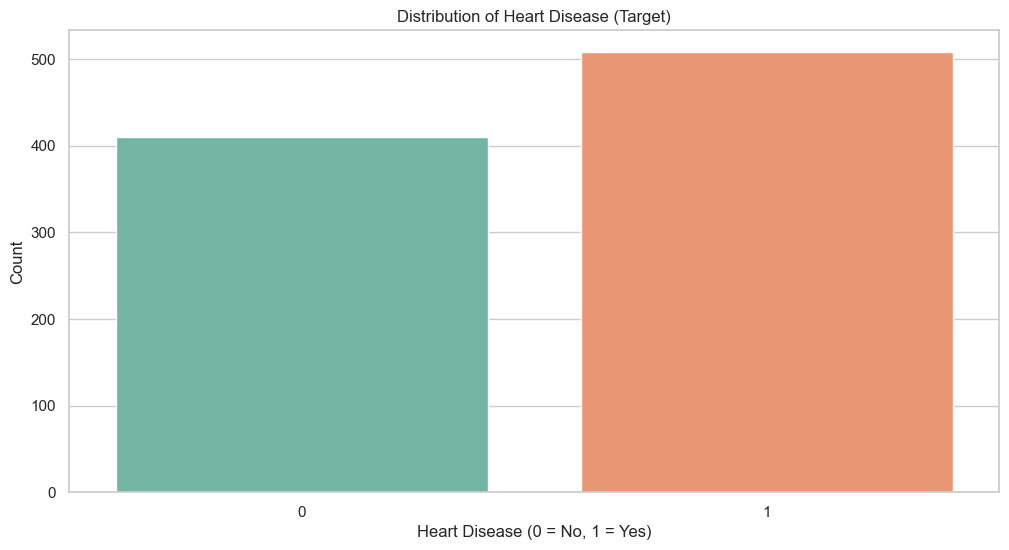

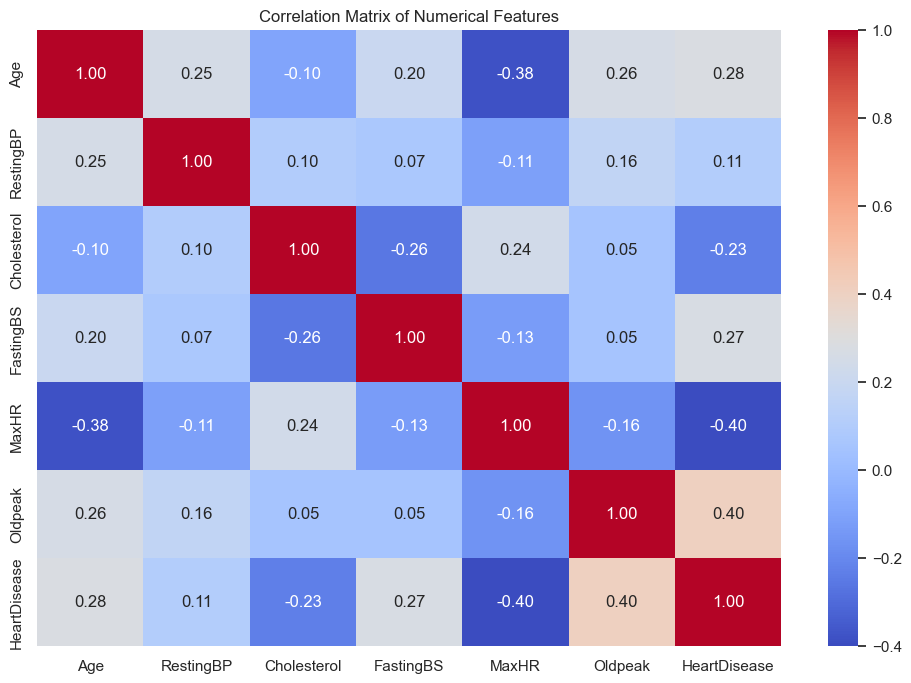

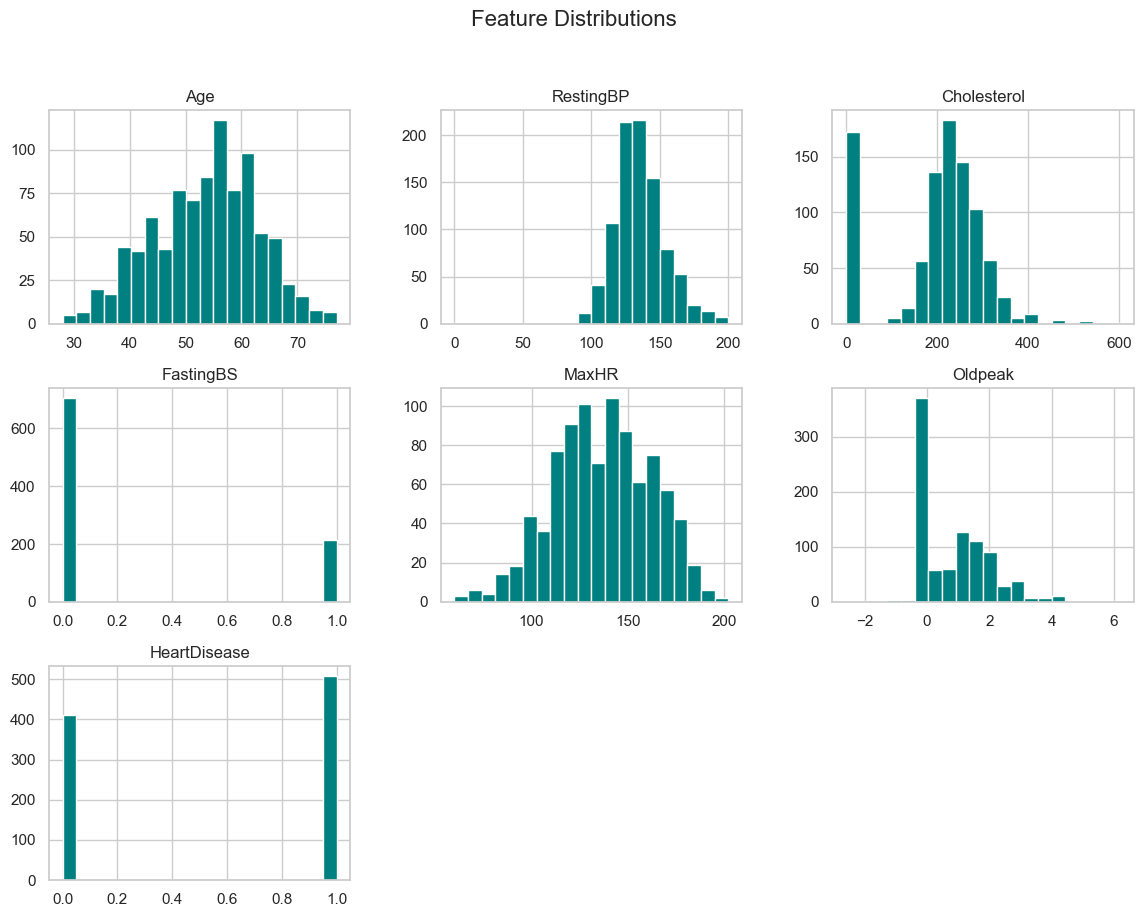

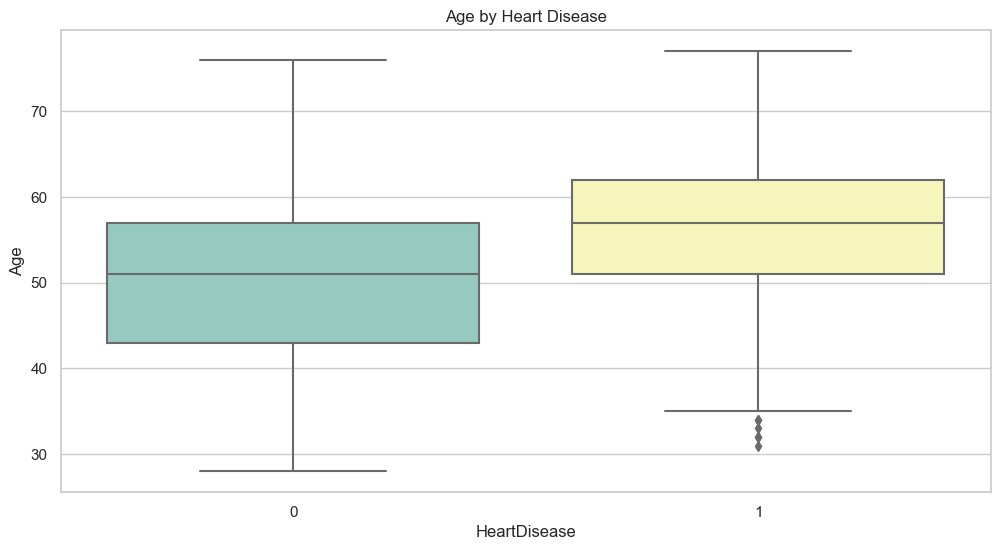

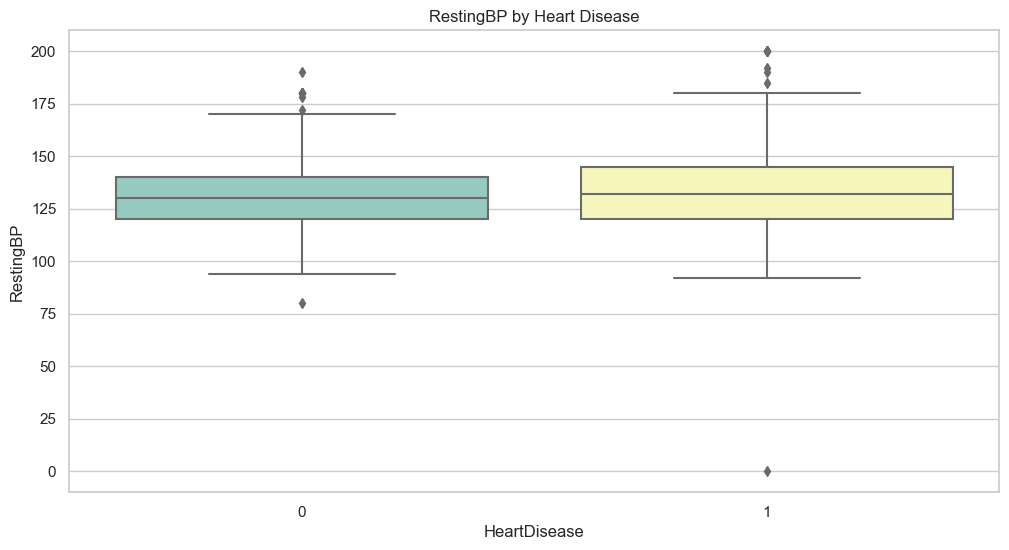

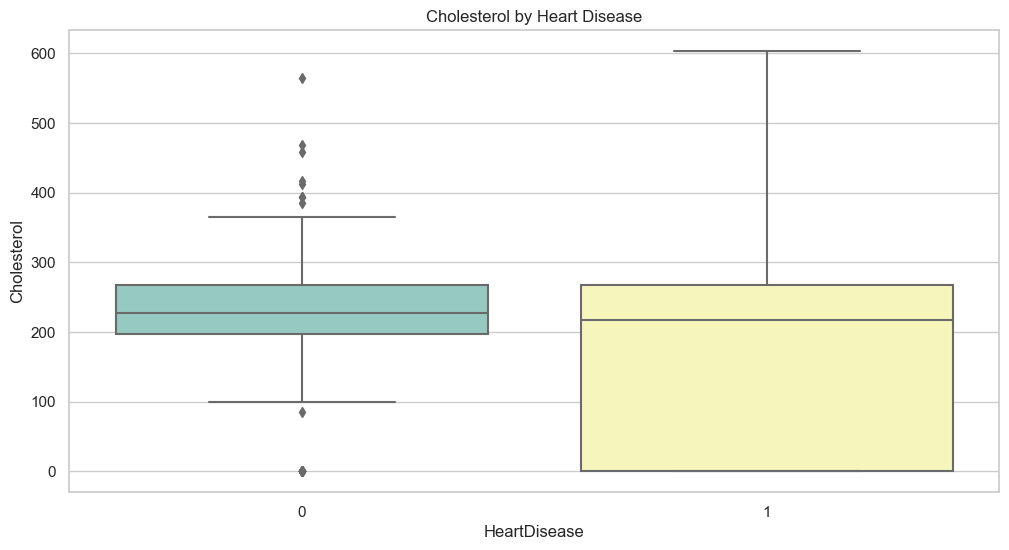

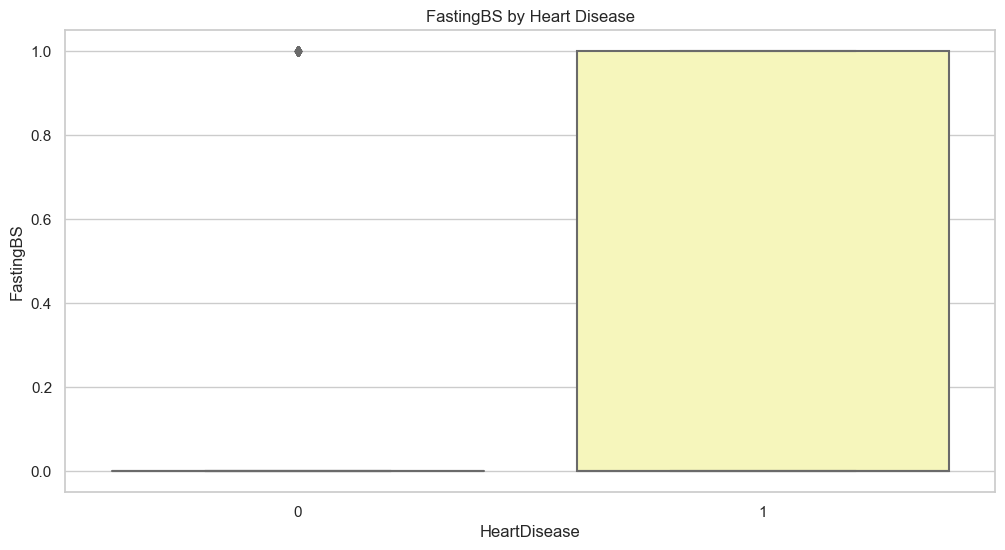

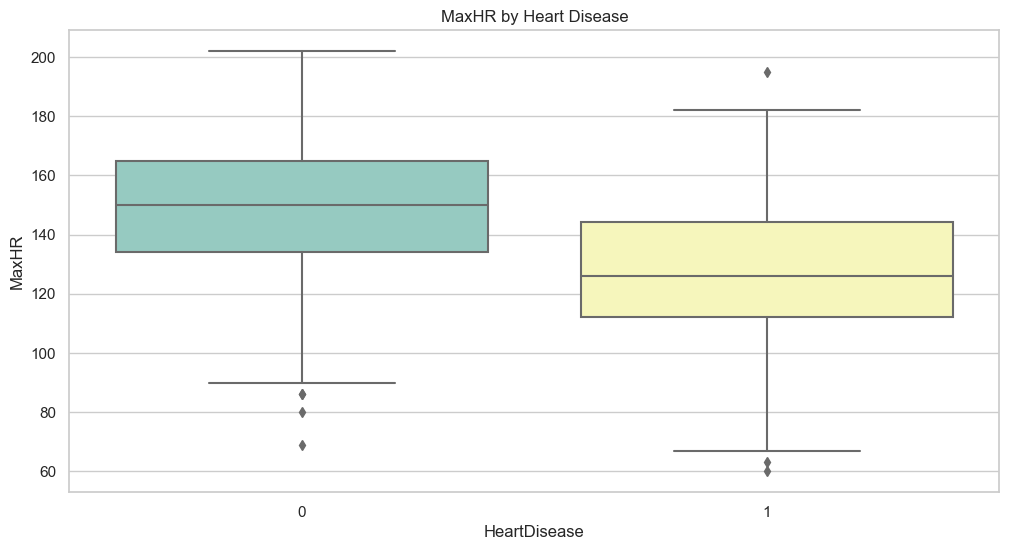

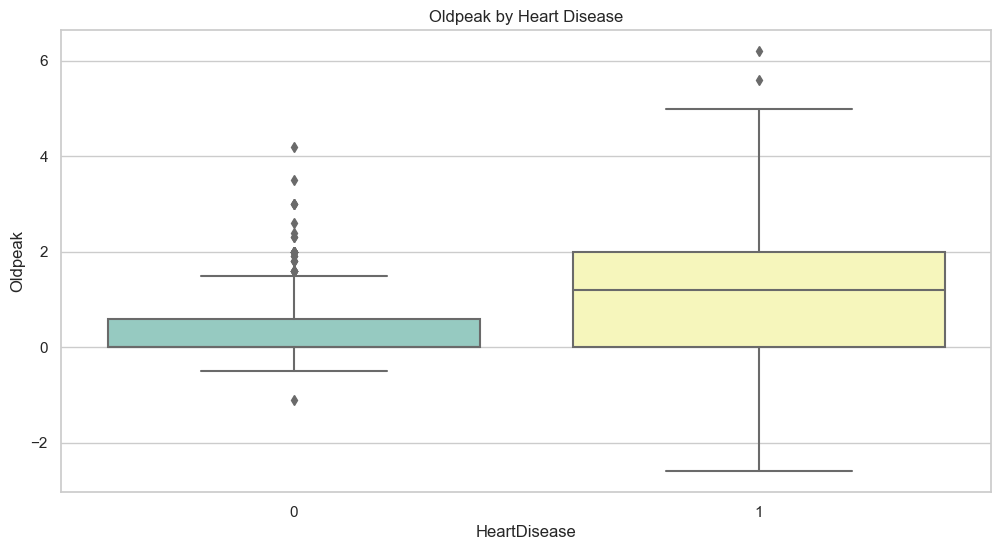

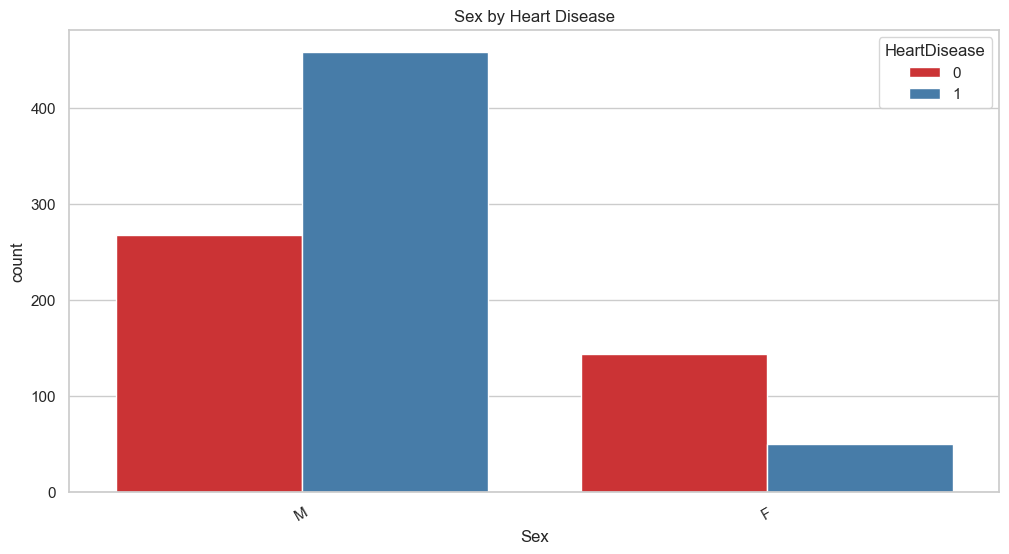

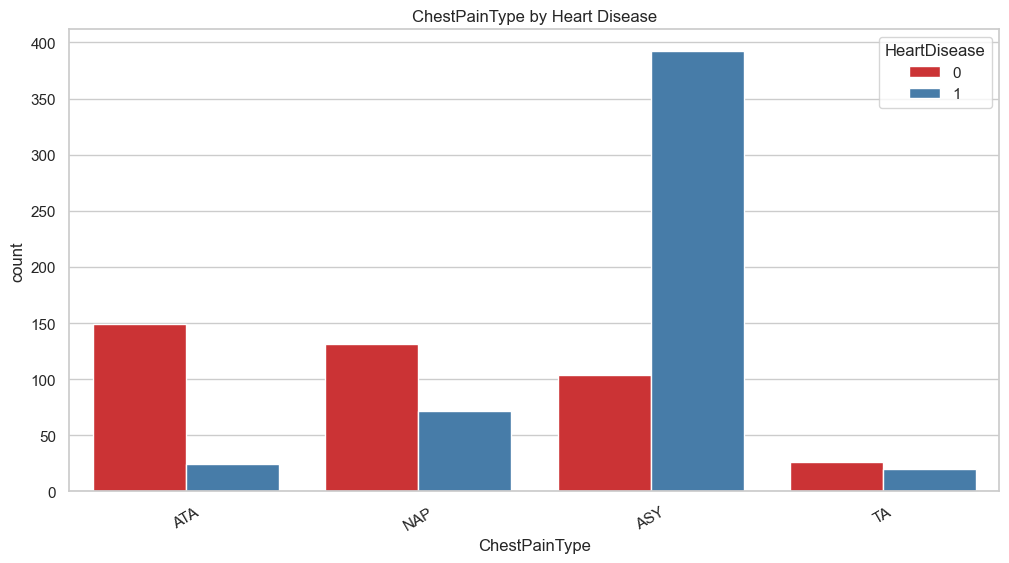

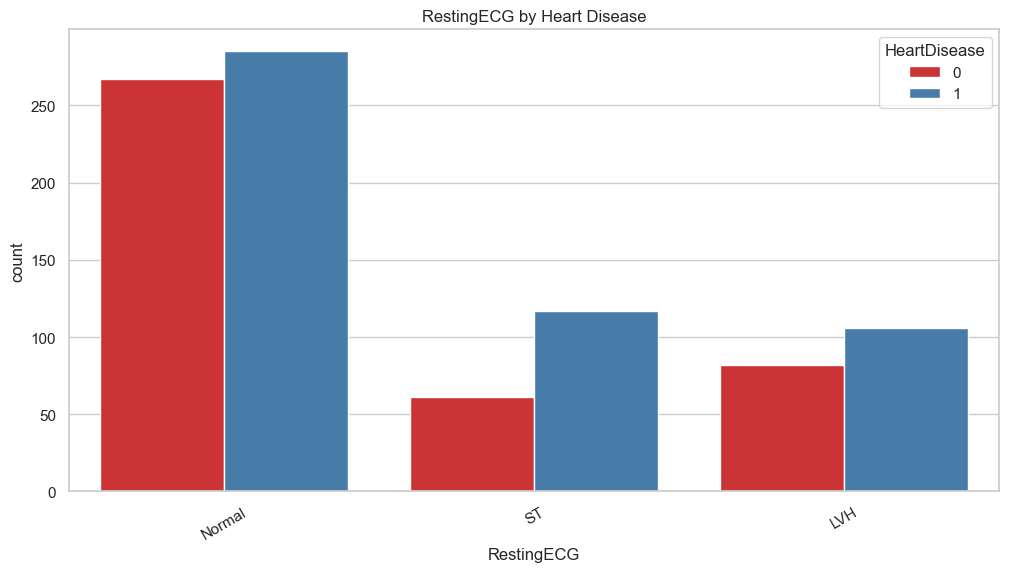

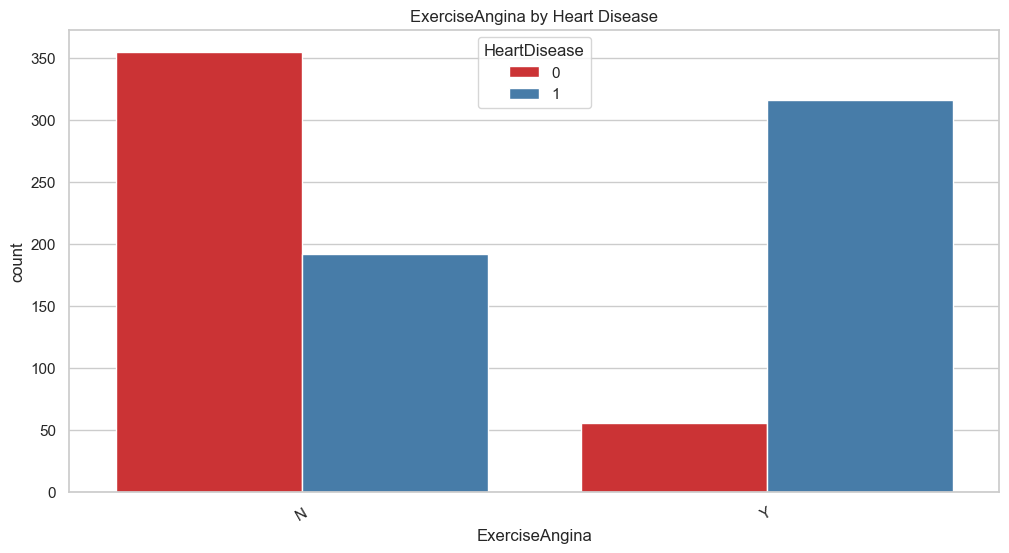

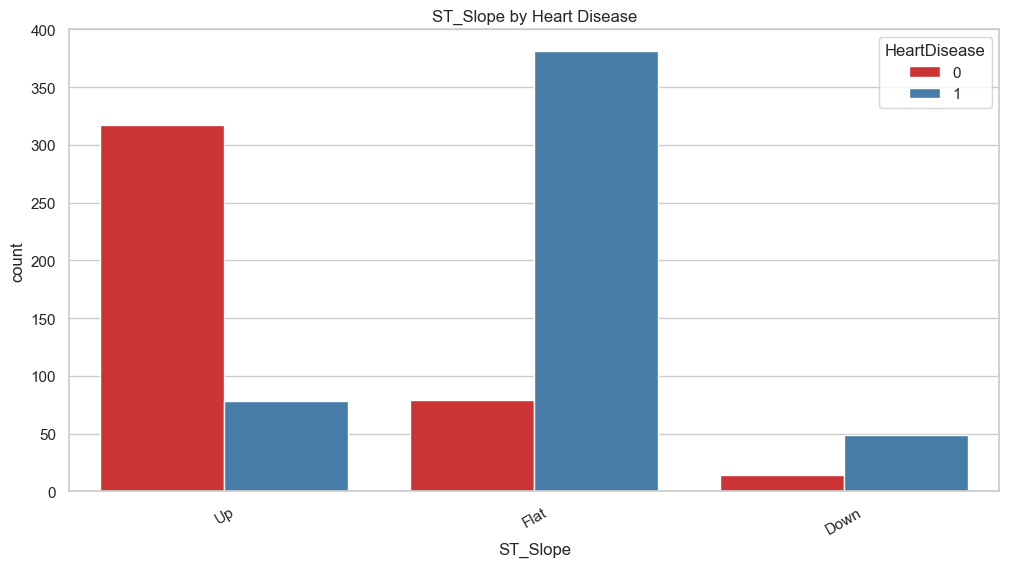

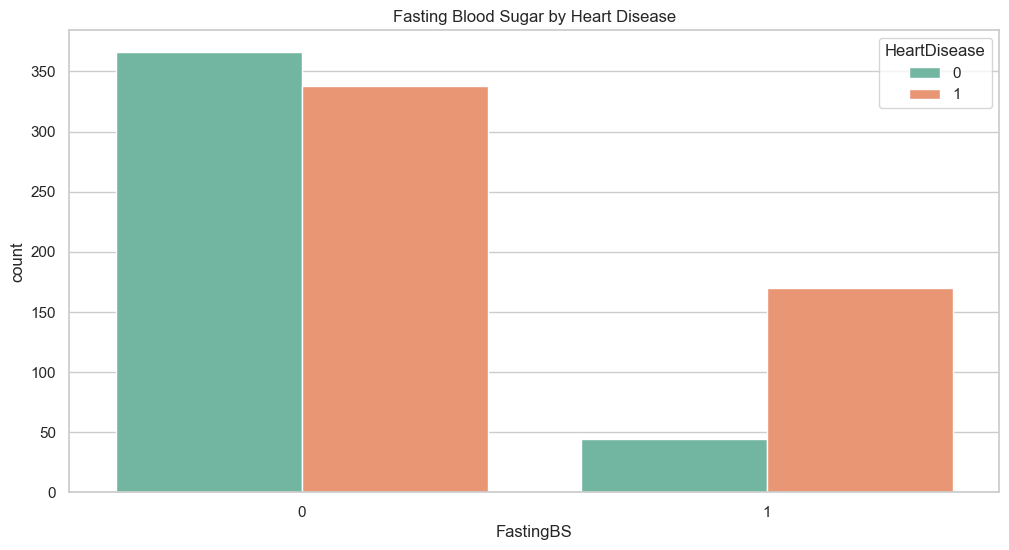


🔹 Skewness of numerical features:
FastingBS       1.264484
Oldpeak         1.022872
RestingBP       0.179839
MaxHR          -0.144359
Age            -0.195933
HeartDisease   -0.215086
Cholesterol    -0.610086
dtype: float64

🔹 Duplicate Rows: 0


In [17]:



# ✅ Basic Info
print("🔹 First 5 rows:")
print(df.head())

print("\n🔹 Dataset shape:", df.shape)
print("\n🔹 Column names:", df.columns.tolist())

print("\n🔹 Data types and missing values:")
print(df.info())
print("\n🔹 Missing values:")
print(df.isnull().sum())

# ✅ Summary statistics
print("\n🔹 Summary statistics:")
print(df.describe())

# ✅ Target variable analysis
print("\n🔹 HeartDisease value counts:")
print(df['HeartDisease'].value_counts())

sns.countplot(x='HeartDisease', data=df, palette='Set2')
plt.title('Distribution of Heart Disease (Target)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# ✅ Correlation Matrix (Numerical Only)
numeric_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# ✅ Histograms of numeric variables
numeric_features.hist(bins=20, figsize=(14, 10), color='teal')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# ✅ Boxplots vs target to check for outliers and distribution
for col in numeric_features.columns:
    if col != 'HeartDisease':
        plt.figure()
        sns.boxplot(x='HeartDisease', y=col, data=df, palette='Set3')
        plt.title(f'{col} by Heart Disease')
        plt.show()

# ✅ Categorical Features Count Plots
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_features:
    plt.figure()
    sns.countplot(x=col, hue='HeartDisease', data=df, palette='Set1')
    plt.title(f'{col} by Heart Disease')
    plt.legend(title='HeartDisease')
    plt.xticks(rotation=30)
    plt.show()

# ✅ FastingBS distribution
plt.figure()
sns.countplot(x='FastingBS', hue='HeartDisease', data=df, palette='Set2')
plt.title('Fasting Blood Sugar by Heart Disease')
plt.show()

# ✅ Skewness check
print("\n🔹 Skewness of numerical features:")
print(numeric_features.skew().sort_values(ascending=False))

# ✅ Check for duplicates
print("\n🔹 Duplicate Rows:", df.duplicated().sum())



In [5]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']


In [6]:
X_encoded = pd.get_dummies(X, drop_first=True)  # Avoid dummy variable trap


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [8]:
print("🔹 First 5 rows:")
print(df.head())

print("\n🔹 Dataset shape:", df.shape)
print("\n🔹 Column names:", df.columns.tolist())

print("\n🔹 Data types and missing values:")
print(df.info())
print("\n🔹 Missing values:")
print(df.isnull().sum())

# ✅ Summary statistics
print("\n🔹 Summary statistics:")
print(df.describe())

# ✅ Target variable analysis
print("\n🔹 HeartDisease value counts:")
print(df['HeartDisease'].value_counts())

🔹 First 5 rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

🔹 Dataset shape: (918, 12)

🔹 Column names: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDis

🔹 Confusion Matrix:
[[67 10]
 [17 90]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184


🔹 Accuracy Score: 0.8533


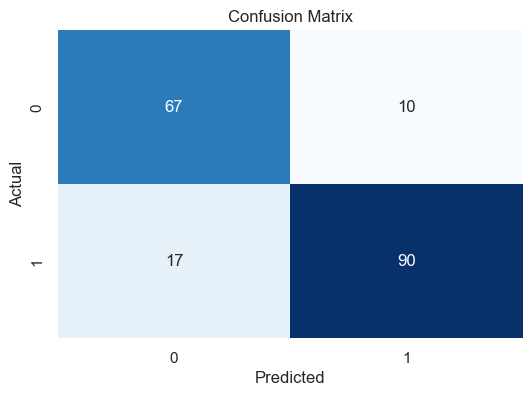

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment if you're loading from CSV

# 1. Separate features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# 2. One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Make predictions
y_pred = model.predict(X_test)

# 7. Evaluate the model
print("🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

print(f"\n🔹 Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Optional: Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🔹 Threshold: 0.5
✅ Accuracy: 0.8533
✅ Precision: 0.9000
✅ Recall: 0.8411
✅ F1 Score: 0.8696


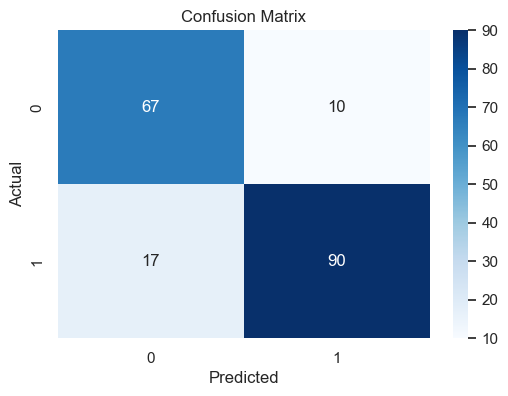


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



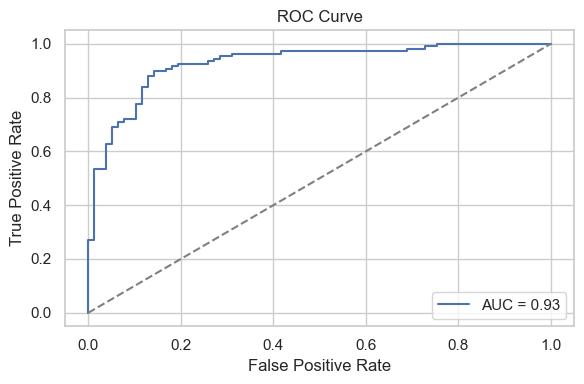


🔹 Top Model Coefficients:
              Feature  Coefficient  AbsCoefficient
13      ST_Slope_Flat     0.656535        0.656535
8   ChestPainType_NAP    -0.625519        0.625519
7   ChestPainType_ATA    -0.572771        0.572771
14        ST_Slope_Up    -0.547821        0.547821
12   ExerciseAngina_Y     0.534734        0.534734
2         Cholesterol    -0.527914        0.527914
6               Sex_M     0.526680        0.526680
5             Oldpeak     0.481159        0.481159
3           FastingBS     0.431151        0.431151
9    ChestPainType_TA    -0.246887        0.246887


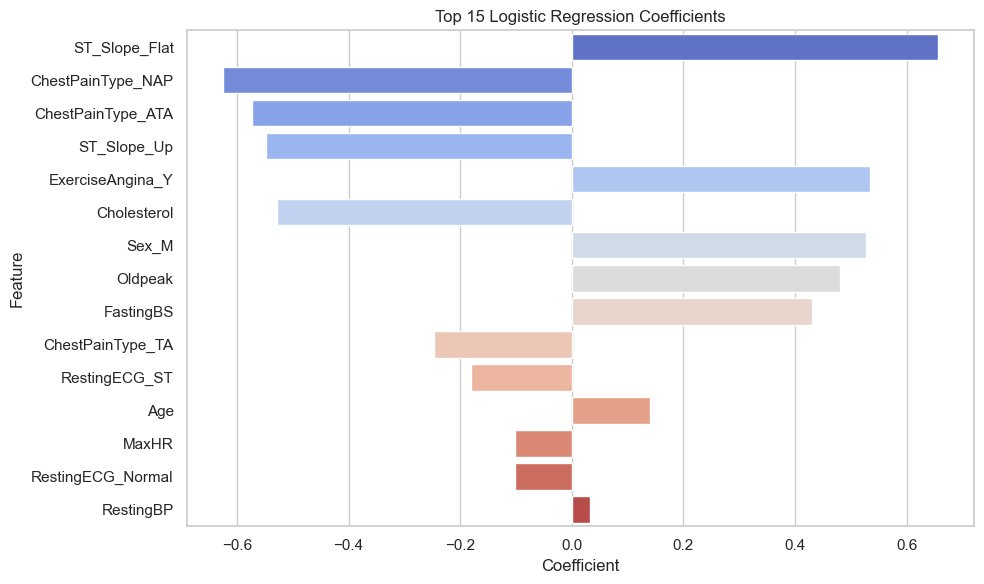

In [12]:
 ##1. Predicted probabilities for class 1 (HeartDisease)
y_prob = model.predict_proba(X_test)[:, 1]

# 2. Threshold selection (default = 0.5, but you can tune this)
threshold = 0.5
y_pred_threshold = (y_prob >= threshold).astype(int)

# 3. Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)

# 4. Print metrics
print(f"🔹 Threshold: {threshold}")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_threshold)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 6. Classification Report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_threshold))

# 7. ROC Curve and AUC Score (optional but helpful)
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

# 8. Model Coefficients
coefficients = model.coef_[0]
features = X_encoded.columns

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
}).sort_values(by='AbsCoefficient', ascending=False)

print("\n🔹 Top Model Coefficients:")
print(coef_df.head(10))

# Optional: Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df.head(15), palette='coolwarm')
plt.title("Top 15 Logistic Regression Coefficients")
plt.tight_layout()
plt.show()

In [14]:


thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for t in thresholds:
    preds = (y_prob >= t).astype(int)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    print(f"Threshold = {t:.2f} → Precision = {prec:.2f}, Recall = {rec:.2f}")


Threshold = 0.30 → Precision = 0.89, Recall = 0.90
Threshold = 0.40 → Precision = 0.90, Recall = 0.88
Threshold = 0.50 → Precision = 0.90, Recall = 0.84
Threshold = 0.60 → Precision = 0.90, Recall = 0.79
Threshold = 0.70 → Precision = 0.91, Recall = 0.76
